#### Załadowanie danych i pakietów

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns

Zbiór danych pochodzi z https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/2019-Oct.csv')

#### Typy danych i nazwy kolumn

In [5]:
print(df.head(1))

df.info(show_counts=True)

                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   

  category_code     brand  price    user_id  \
0           NaN  shiseido  35.79  541312140   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   event_time     42448764 non-null  object 
 1   event_type     42448764 non-null  object 
 2   product_id     42448764 non-null  int64  
 3   category_id    42448764 non-null  int64  
 4   category_code  28933155 non-null  object 
 5   brand          36331684 non-null  object 
 6   price          42448764 non-null  float64
 7   user_id        42448764 non-null  int64  
 8   user_session   42448762 non-null  object 
dtypes: float64(1), int64(3), object(5)
m

In [6]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


#### Podsumowanie cen

In [7]:
pd.set_option('float_format', '{:.2f}'.format)

df['price'].describe()

count   42448764.00
mean         290.32
std          358.27
min            0.00
25%           65.98
50%          162.93
75%          358.57
max         2574.07
Name: price, dtype: float64

#### Jaki procent zdarzeń stanowi dany typ wydarzenia: `purchase`, `view`, `cart`?

In [8]:
def percent_of_events(event_type):
    df_events = df[["event_type"]]
    no_of_events = len(df_events["event_type"])
    df_events = df_events.loc[(df["event_type"] == event_type)]
    no_of_events_type = df_events.count()["event_type"]

    return print(f'{event_type} miał miejsce {no_of_events_type} razy. {round(no_of_events_type/no_of_events*100, 2)}% wszystkich zdarzeń stanowi {event_type}')

percent_of_events("purchase")

purchase miał miejsce 742849 razy. 1.75% wszystkich zdarzeń stanowi purchase


In [9]:
visitors = df['user_id'].nunique()
print(f"Liczba unikalnych odwiedzających : {visitors}")

sessions = df['user_session'].nunique()
print(f"Liczba unikalnych sesji: {sessions}")

Liczba unikalnych odwiedzających : 3022290
Liczba unikalnych sesji: 9244421


In [10]:
print(f"Liczba uniklanych produktów: {df['product_id'].nunique()}")

Liczba uniklanych produktów: 166794


#### W jaki dzień sprzedano najwięcej produktów?

In [11]:
purchase_date = df.loc[:,['event_time', 'user_id', 'event_type']]
purchase_date = purchase_date.loc[(purchase_date['event_type'] == 'purchase')]
purchase_date['event_time'] = purchase_date['event_time'].apply(lambda s: str(s)[0:10])
purchase_date.head()

,event_time,user_id,event_type
162,2019-10-01,543272936,purchase
308,2019-10-01,551377651,purchase
379,2019-10-01,514591159,purchase
442,2019-10-01,555332717,purchase
574,2019-10-01,524601178,purchase


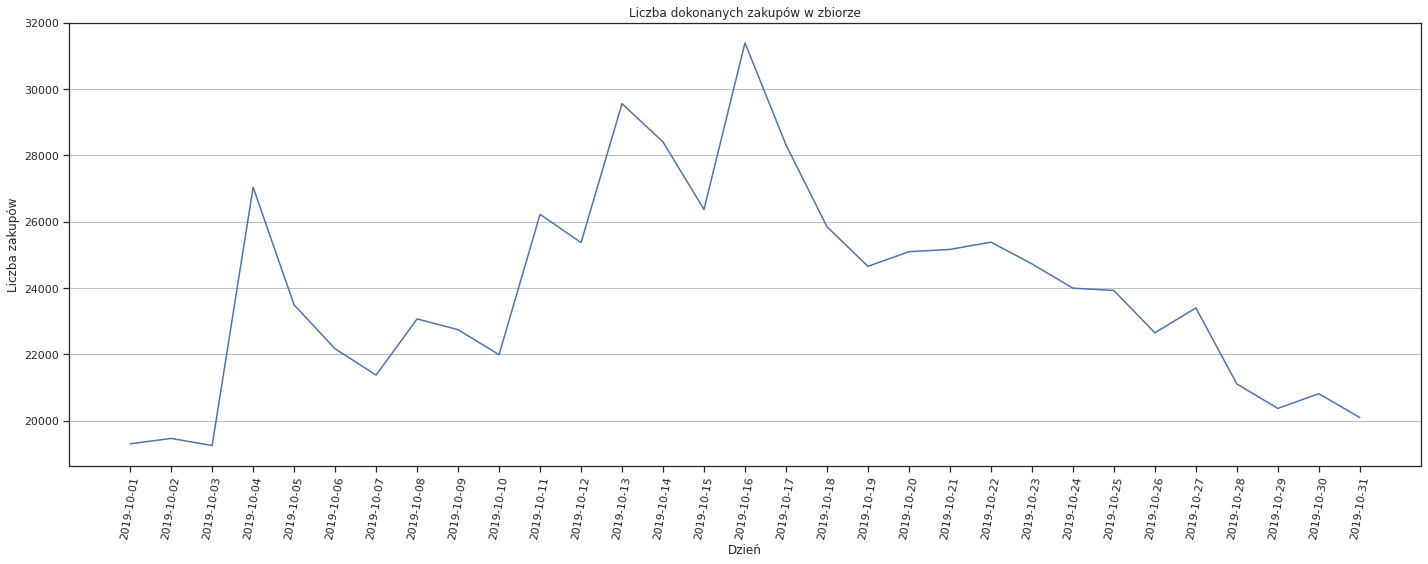

In [12]:
daily_purchases = purchase_date.groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

sns.set(rc={'figure.figsize':(20, 8)})
sns.set_style("ticks")
lineplot_days = sns.lineplot(x='event_time', y='count', data=daily_purchases)
lineplot_days.set(xlabel='Dzień', ylabel='Liczba zakupów')
plt.title("Liczba dokonanych zakupów w zbiorze")
plt.grid(axis='y', color="grey", linewidth=0.5)
for item in lineplot_days.get_xticklabels():
    item.set_rotation(80)

plt.tight_layout()
plt.show()

#### Godzina zakupu

In [13]:
purchase_time = df.loc[:,['event_time', 'user_id', 'event_type']]
purchase_time = purchase_time.loc[(purchase_time['event_type'] == 'purchase')]
purchase_time['event_time'] = pd.to_datetime(purchase_time.event_time)
purchase_time['hour'] = purchase_time['event_time'].map(lambda x: x.hour)
purchase_time.head()

,event_time,user_id,event_type,hour
162,2019-10-01 00:02:14+00:00,543272936,purchase,0
308,2019-10-01 00:04:37+00:00,551377651,purchase,0
379,2019-10-01 00:06:02+00:00,514591159,purchase,0
442,2019-10-01 00:07:07+00:00,555332717,purchase,0
574,2019-10-01 00:09:26+00:00,524601178,purchase,0


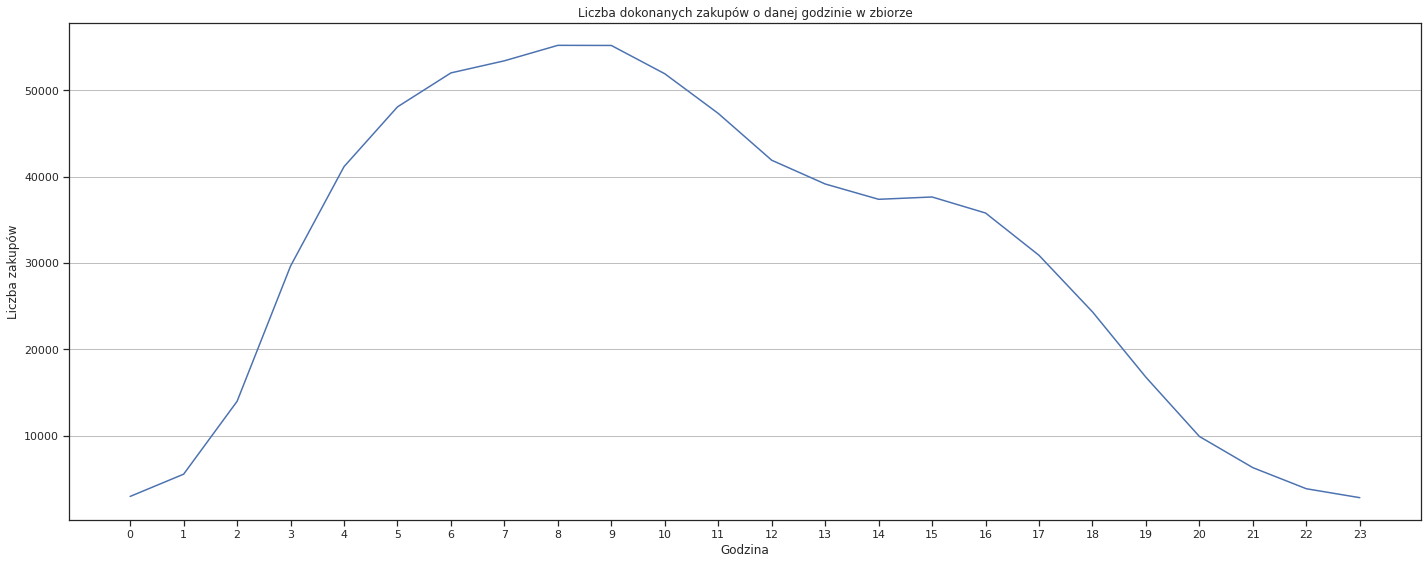

In [14]:
daily_purchases = purchase_time.groupby(['hour'])['user_id'].agg(['count']).sort_values(by=['hour'], ascending=True)

lineplot_hours = sns.lineplot(x='hour', y='count', data=daily_purchases)
lineplot_hours.set(xlabel='Godzina', ylabel='Liczba zakupów')
plt.title("Liczba dokonanych zakupów o danej godzinie w zbiorze")
plt.grid(axis='y', color="grey", linewidth=0.5)
plt.tight_layout()
plt.xticks([1 * i for i in range(0,24)])
plt.show()

Duży udział zakupów w godzinach porannych (według czasu UTC) może sugerować, że sklep nie znajduje się w Europie.

### Sprzedaż ze względu na markę

In [15]:
unique_brands = df['brand'].nunique()
print(f'Liczba uniklanych marek w zbiorze to {unique_brands}')

Liczba uniklanych marek w zbiorze to 3444


#### Co sprzedaje się częściej produkt z marką, czy bez marki?

In [16]:
brands_purchased = df.loc[(df['event_type'] == 'purchase')]
off_brand = brands_purchased['brand'].isnull().sum()

print(f'{round(off_brand/len(df.loc[(df["event_type"] == "purchase")])*100, 2)}% zakupionych produktów stanowią produkty bez marki')

7.85% zakupionych produktów stanowią produkty bez marki


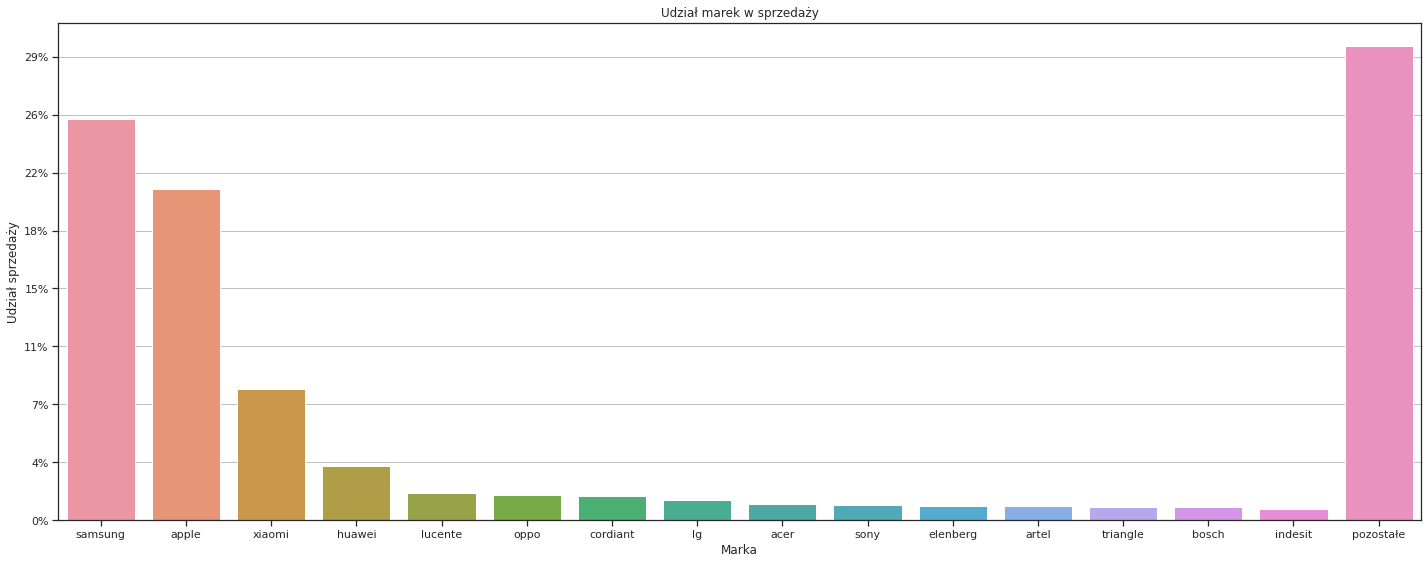

In [17]:
brands_y = brands_purchased['brand'].value_counts()
brands_y_top = brands_y.head(15)

if len(brands_y) > 15:
    brands_y_top['pozostałe'.format(len(brands_y) - 15)] = sum(brands_y[15:])

brands_y_top = pd.DataFrame(brands_y_top)
brands_y_top.reset_index(inplace=True)
brands_y_top.columns = ['brand', 'count']

brands_barplot = sns.barplot(x='brand', y='count', data=brands_y_top)
brands_barplot.set(xlabel='Marka', ylabel='Udział sprzedaży')

plt.title("Udział marek w sprzedaży")
plt.grid(axis='y', color="grey", linewidth=0.5)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100/sum(brands_y)) for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

Ponad połowę zakupionych produktów stanowią produkty trzech marek.

### Struktura `event_type`

In [18]:
event_types = df['event_type'].unique()
print(f'Możliwe wartości event_type to: {event_types}')

Możliwe wartości event_type to: ['view' 'purchase' 'cart']


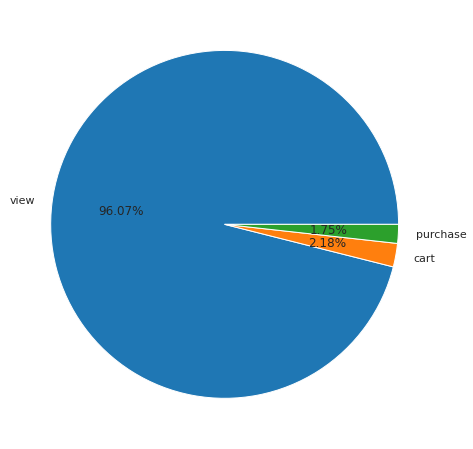

In [19]:
event_types_share = df.loc[:,['event_type']]
event_types_share = event_types_share['event_type'].value_counts()

colors = sns.color_palette('tab10')[0:3]
plt.pie(event_types_share, labels = ['view', 'cart', 'purchase'],colors=colors, autopct = '%.2f%%')
plt.show()

### Podział ze względu na kategorie produktów
#### Podział kategorii ze względu na liczbę zdarzeń

 Liczba kategorii w zbiorze to 126


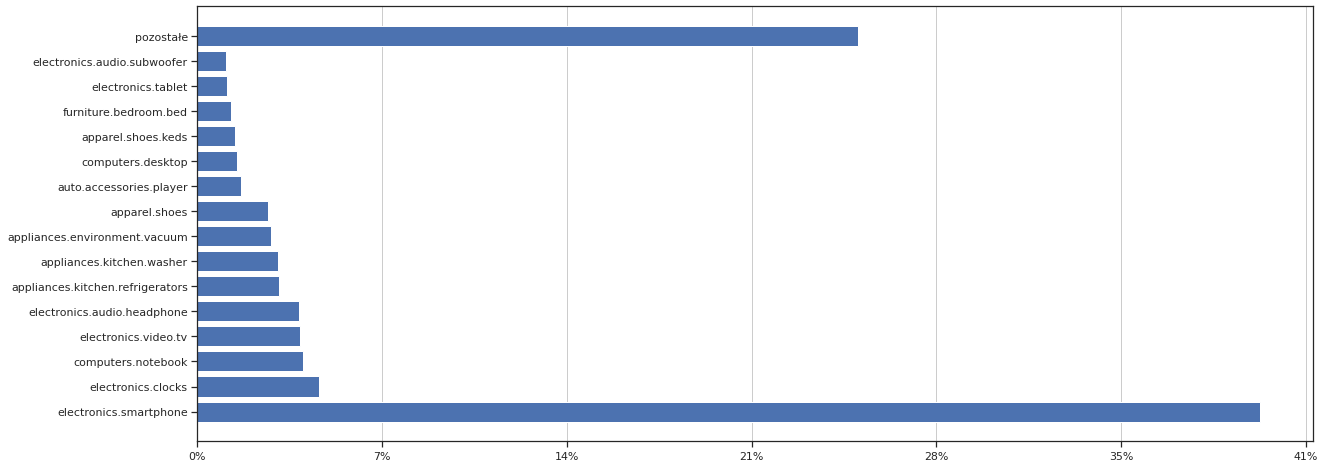

In [20]:
categories = df.loc[:,['category_code']]
categories_y = categories['category_code'].value_counts()
categories_count = categories['category_code'].nunique()
print(f' Liczba kategorii w zbiorze to {categories_count}')

categories_y_top = categories_y.head(15)

if len(categories_y) > 15:
    categories_y_top['pozostałe'.format(len(categories_y) - 15)] = sum(categories_y[15:])
    
kategorie_x = pd.Series(categories_y_top.index.values)

plt.barh(kategorie_x, categories_y_top)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100/sum(categories_y)) for x in plt.gca().get_xticks()])
plt.grid(axis = 'x')
plt.show()

Udział sprzedanych produktów bez kategorii

In [21]:
off_category = df.loc[(df['event_type'] == 'purchase')]
off_category = off_category['category_code'].isnull().sum()

print(f'{round(off_category/len(df.loc[(df["event_type"] == "purchase")])*100, 2)}% zakupionych produktów stanowią produkty bez kategorii')

23.35% zakupionych produktów stanowią produkty bez kategorii


#### Podział kategorii ze względu na sprzedaż

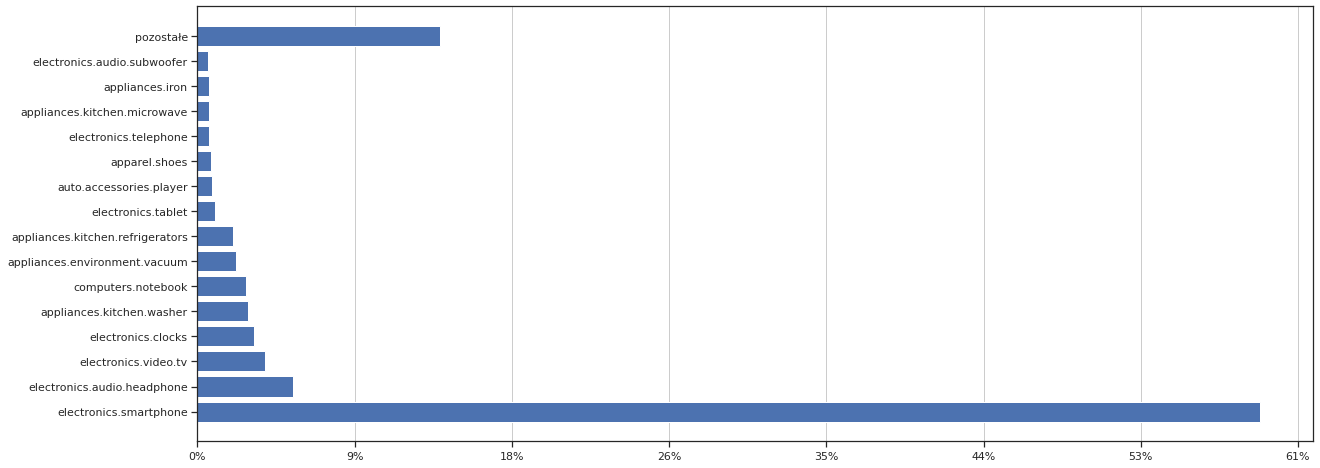

In [22]:
categories_events = df.loc[:,['category_code','event_type']]
categories_sales = categories_events.loc[(categories_events['event_type'] == 'purchase')]

categories_sales = categories_sales['category_code'].value_counts()
categories_sales_top = categories_sales.head(15)

if len(categories_sales) > 15:
    categories_sales_top['pozostałe'.format(len(categories_sales) - 15)] = sum(categories_sales[15:])
    
categories_sales_x = pd.Series(categories_sales_top.index.values)

plt.barh(categories_sales_x, categories_sales_top)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100/sum(categories_sales)) for x in plt.gca().get_xticks()])
plt.grid(axis = 'x')
plt.show()

Pewne kategorie produktów posiadają większą ilość interakcji, ale są rzadziej kupowane, np. buty. Natomiast smartfony są najczęściej kupowany produktem w sklepie, mimo stosunkowo mniejszego udziału wśród interakcji. Może to wynikać z faktu, że cześć smartfonów kupowana jest bez dodawania do koszyka.

### Przykładowy klient

In [23]:
user = df.sample(1)
user = int(user['user_id'])

client = df.loc[(df['user_id'] == user)]
pd.set_option('display.max_rows',500)
client

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
23130881,2019-10-17 17:11:03 UTC,view,15100039,2053013557024391671,NaN,ostamebel,641.97,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23132048,2019-10-17 17:11:45 UTC,view,15100039,2053013557024391671,NaN,ostamebel,641.97,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23133462,2019-10-17 17:12:38 UTC,view,15100118,2053013557024391671,NaN,sv,514.56,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23133740,2019-10-17 17:12:47 UTC,view,15100039,2053013557024391671,NaN,ostamebel,641.97,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23133938,2019-10-17 17:12:54 UTC,view,15100100,2053013557024391671,NaN,NaN,437.33,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23137916,2019-10-17 17:15:17 UTC,view,15100110,2053013557024391671,NaN,NaN,849.19,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23138588,2019-10-17 17:15:43 UTC,view,15100100,2053013557024391671,NaN,NaN,437.33,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23138733,2019-10-17 17:15:48 UTC,view,15100125,2053013557024391671,NaN,NaN,1112.00,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23140254,2019-10-17 17:16:45 UTC,view,15100309,2053013557024391671,NaN,NaN,385.85,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009
23142498,2019-10-17 17:18:12 UTC,view,15100125,2053013557024391671,NaN,NaN,1112.00,520650802,4311d28d-83c6-4049-8e7a-861e54fc6009


Sprawdzenie losowych kategorii produktów -- czy jakaś kategoria ma taki sam `category_id`, ale różne `category_code`.

In [38]:
category_id_check = df.sample(1)
category_id_check = int(category_id_check['category_id'])

category_check = df.loc[(df['category_id'] == category_id_check)]
pd.set_option('display.max_rows',500)
print(category_check["category_code"].unique())
category_check

['electronics.smartphone']


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11 UTC,view,1005011,2053013555631882655,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
...,...,...,...,...,...,...,...,...,...
42448744,2019-10-31 23:59:53 UTC,view,1004708,2053013555631882655,electronics.smartphone,huawei,151.99,566031393,8fbc7d60-6ae5-41c9-985c-cee9c52ab9ae
42448746,2019-10-31 23:59:54 UTC,view,1002786,2053013555631882655,electronics.smartphone,NaN,391.26,512789086,cc782b99-88ab-4573-8311-c62e1d447757
42448751,2019-10-31 23:59:56 UTC,view,1005008,2053013555631882655,electronics.smartphone,xiaomi,94.46,557202408,2169c430-9acc-4db8-8061-ac70ff0c66ea
42448752,2019-10-31 23:59:56 UTC,view,1003936,2053013555631882655,electronics.smartphone,xiaomi,437.33,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
